In [2]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
import operator
import copy
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from MyDecisionTree import MyDTree
%matplotlib inline

/home/parallels/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def createDataSet():
    """DateSet 基础数据集
    Args:
        无需传入参数
    Returns:
        返回数据集和对应的label标签
    """
    dataSet = pd.DataFrame([[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']],columns=['no surfacing', 'flippers','label'])
    labels = dataSet['label']
    dataSet = dataSet[['no surfacing','flippers']]
    # change to discrete values
    return dataSet, labels

In [3]:
X,y = createDataSet()

In [4]:
DT = MyDTree().fit(X,y)

## 决策树分类器

In [5]:
testData = pd.DataFrame([[0,0]],columns=['no surfacing', 'flippers'])

In [6]:
print DT.predict(testData)

['no']


## 预测隐形眼镜

In [7]:
fr = open('data/lenses.txt')

In [8]:
data = pd.read_table('data/lenses.txt',header=None)
data.columns=['age', 'prescript', 'astigmatic', 'tearRate','label']

In [9]:
data = data[:15]

In [10]:
data

,age,prescript,astigmatic,tearRate,label
0,young,myope,no,reduced,no lenses
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,no lenses
3,young,myope,yes,normal,hard
4,young,hyper,no,reduced,no lenses
5,young,hyper,no,normal,soft
6,young,hyper,yes,reduced,no lenses
7,young,hyper,yes,normal,hard
8,pre,myope,no,reduced,no lenses
9,pre,myope,no,normal,soft


In [11]:
X = data[['age', 'prescript', 'astigmatic', 'tearRate']]
y = data['label']

In [12]:
DT = MyDTree().fit(X,y)

In [13]:
testData = pd.DataFrame([['presbyopic','hyper','no','normal'],['pre','hyper','no','normal']],columns=['age', 'prescript', 'astigmatic', 'tearRate'])

In [14]:
testData

,age,prescript,astigmatic,tearRate
0,presbyopic,hyper,no,normal
1,pre,hyper,no,normal


In [15]:
print DT.predict(testData)

['no lenses' 'soft']


### 使用skleanr中的iris数据测试

In [16]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [17]:
y_train = pd.Series(y_train)
type(y_train)

pandas.core.series.Series

In [18]:
y_train.value_counts().index[0]

2

In [19]:
X_train = pd.DataFrame(X_train)

In [22]:
DT = MyDTree().fit(X_train,y_train)

In [23]:
X_test = pd.DataFrame(X_test)

In [28]:
y_pred = DT.predict(X_test)

In [29]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 5


## 使用sklearn的决策树分类器

In [30]:
#数据准备
#读取样本数据，并划分成训练集和测试集
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [31]:
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [32]:
y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 2


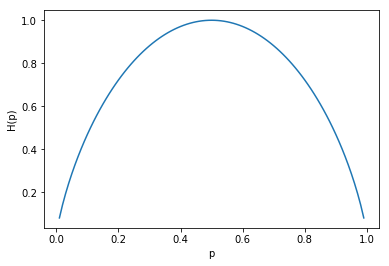

In [4]:
x = np.arange(0.0, 1.0, 0.01)
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))
ent = [entropy(p) if p != 0 else None for p in x]
plt.plot(x,ent)
plt.ylabel('H(p)')
plt.xlabel('p')
plt.show()